# **SpaceX Falcon 9 First Stage Landing Prediction**

## Exploring and Preparing Data

### Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Reading the Dataset

In [2]:
df = pd.read_csv( "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


### Exploratory Data Analysis

First let's try see how the FlightNumber and Payload variables would affect the launch outcomes

We can plot the FlightNumber vs. Payload and overlay the outcome of the launch.

<Figure size 1000x800 with 0 Axes>

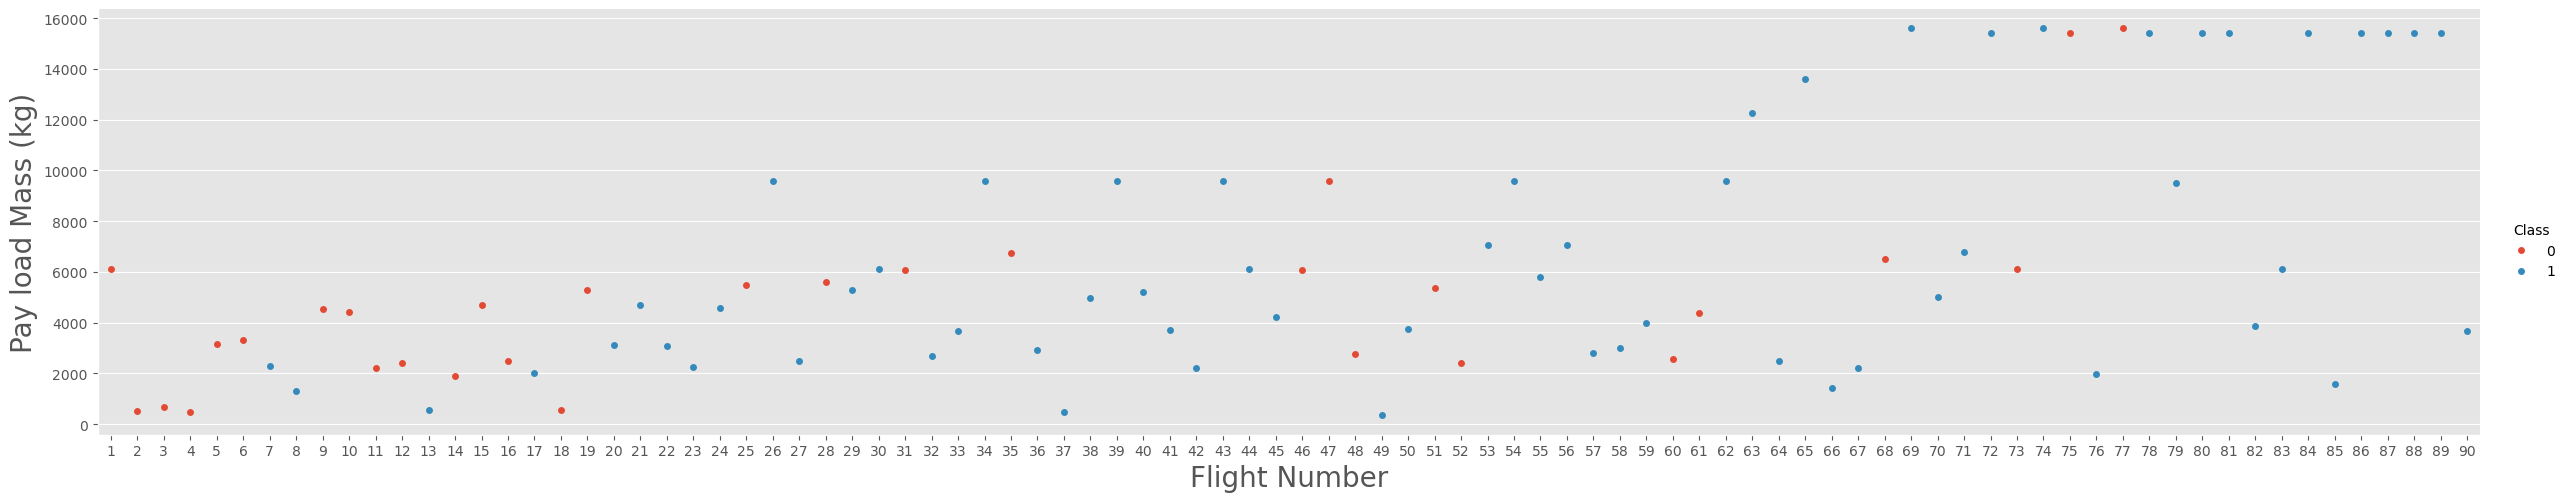

In [4]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 8))
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

#### 1. Visualize the relationship between Flight Number and LaunchSite

<Figure size 1000x800 with 0 Axes>

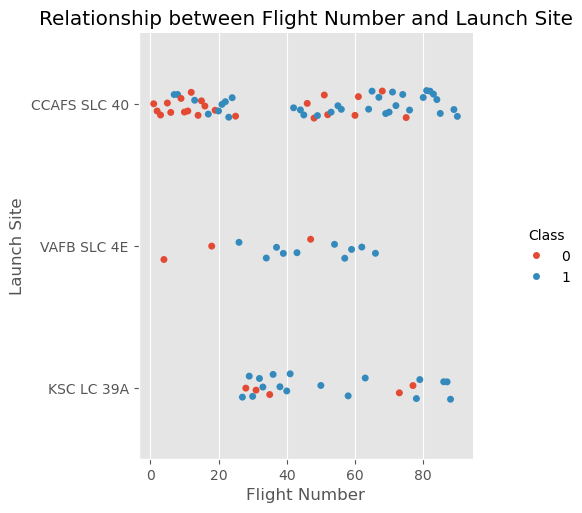

In [6]:
plt.figure(figsize=(10,8))
sns.catplot(data = df, x = 'FlightNumber',
           y='LaunchSite',
           hue='Class')
plt.title('Relationship between Flight Number and Launch Site')
plt.xlabel('Flight Number')
plt.ylabel('Launch Site')
#plt.tight_layout()
plt.show()

In [8]:
import plotly.express as px

#### 2.Visualizing relationship between payload_mass and Launch Site  

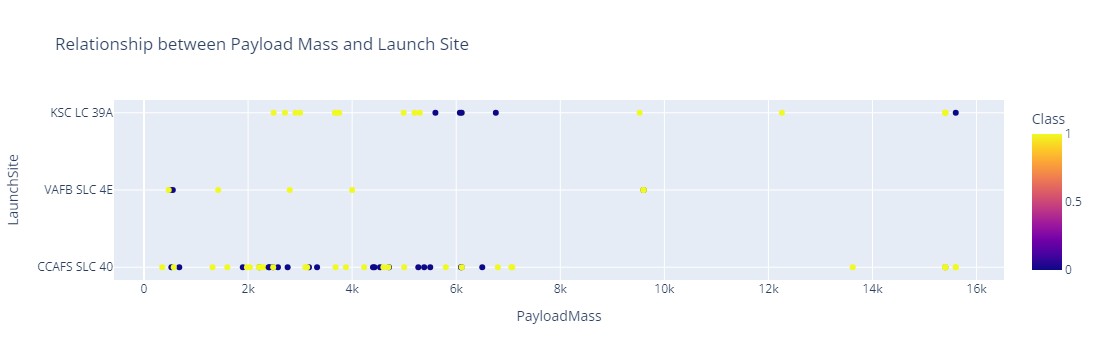

In [13]:

fig = px.scatter(df, x='PayloadMass', y='LaunchSite', color='Class',
                title = 'Relationship between Payload Mass and Launch Site')
fig.show()

#### 3. Visualize Relationship between success rate of each orbit type

In [29]:
# We need to count the success rate based on orbits
orbit_success= df.groupby('Orbit')['Class'].mean().reset_index()

In [37]:
orbit_success.rename(columns = {'Class': 'Success_Rate'}, inplace = True)

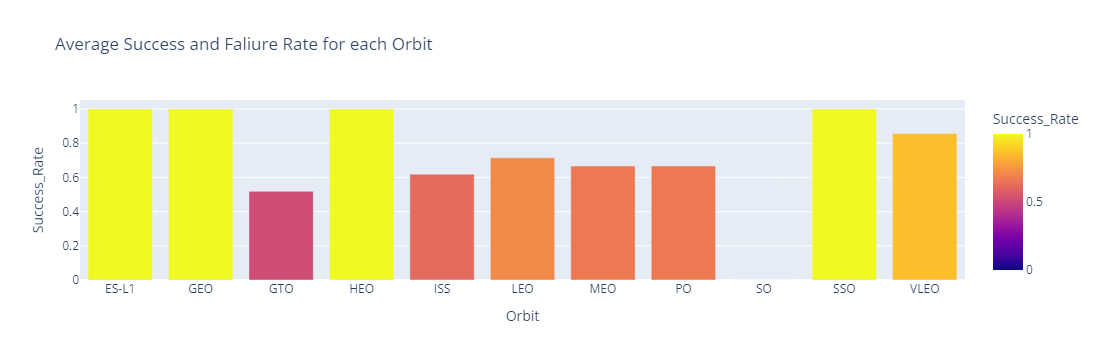

In [38]:

fig = px.bar(orbit_success, x='Orbit', y='Success_Rate', color = 'Success_Rate', 
            title = 'Average Success and Faliure Rate for each Orbit')
fig.show()

#### 4.Visualize the relationship between FlightNumber and Orbit type

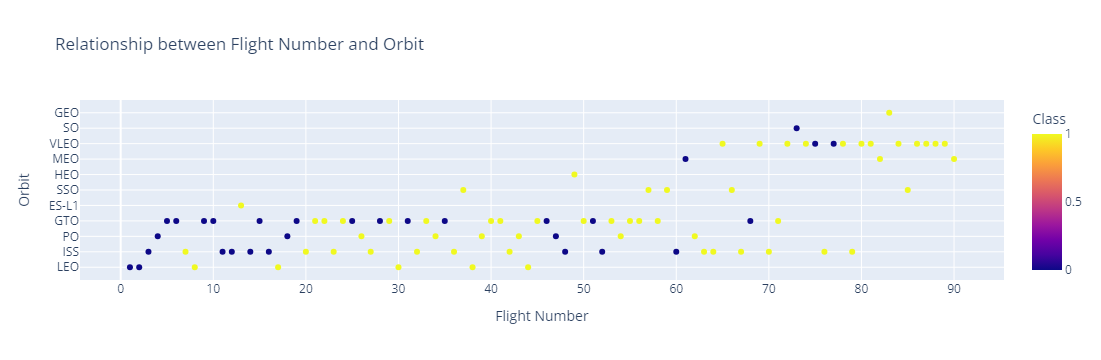

In [42]:
labels = {'FlightNumber': 'Flight Number', 'Orbit': 'Orbit'}
fig = px.scatter(df, x='FlightNumber', y='Orbit', color='Class',
                title = 'Relationship between Flight Number and Orbit',
                labels = labels)
fig.show()

#### 5. Visualize the relationship between Payload Mass and Orbit type 

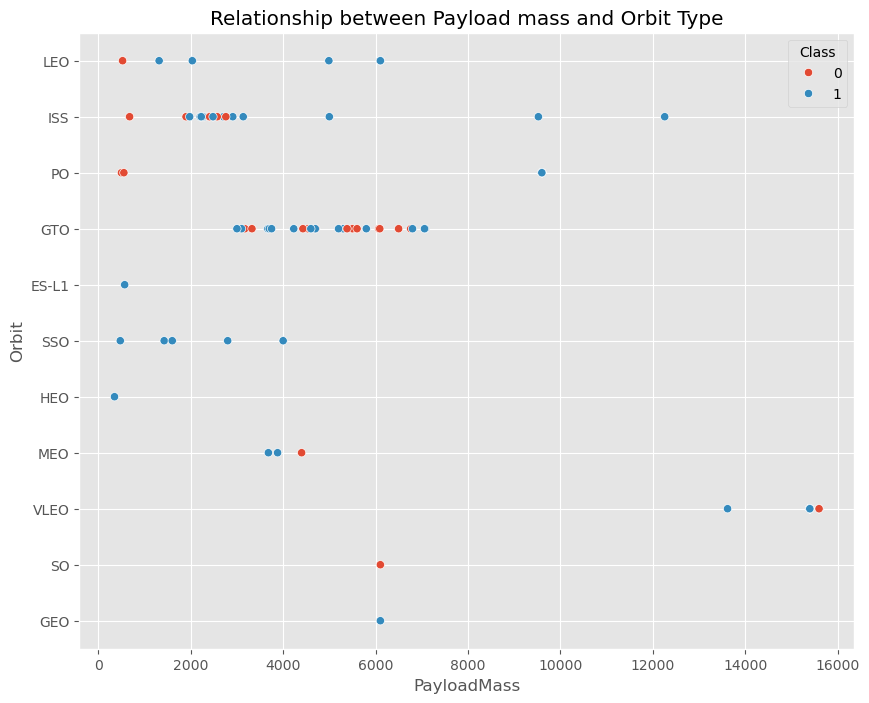

In [44]:
plt.figure(figsize=(10, 8))
sns.scatterplot(df, x='PayloadMass', y='Orbit', hue='Class')
plt.title('Relationship between Payload mass and Orbit Type')
plt.show()

#### 6. Visualize the launch success yearly trend 

In [45]:
df.dtypes

FlightNumber        int64
Date               object
BoosterVersion     object
PayloadMass       float64
Orbit              object
LaunchSite         object
Outcome            object
Flights             int64
GridFins             bool
Reused               bool
Legs                 bool
LandingPad         object
Block             float64
ReusedCount         int64
Serial             object
Longitude         float64
Latitude          float64
Class               int64
dtype: object

In [54]:
# Extract the year value from the Date column for each row
year= []
for i, value in enumerate(df['Date']):
    string = value.strip()
    new_value = string[0:4]
    year.append(new_value)

print(year[:5])

['2010', '2012', '2013', '2013', '2013']


In [55]:
year[:5]

['2010', '2012', '2013', '2013', '2013']

In [58]:
# Create a new column for the years
df['Year'] = year

In [59]:
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class,Year
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0,2010
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0,2012
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0,2013
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0,2013
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0,2013


In [60]:
year_outcomes = df.groupby('Year')['Class'].mean().reset_index()

In [61]:
year_outcomes.head()

,Year,Class
0,2010,0.000000
1,2012,0.000000
2,2013,0.000000
3,2014,0.333333
4,2015,0.333333


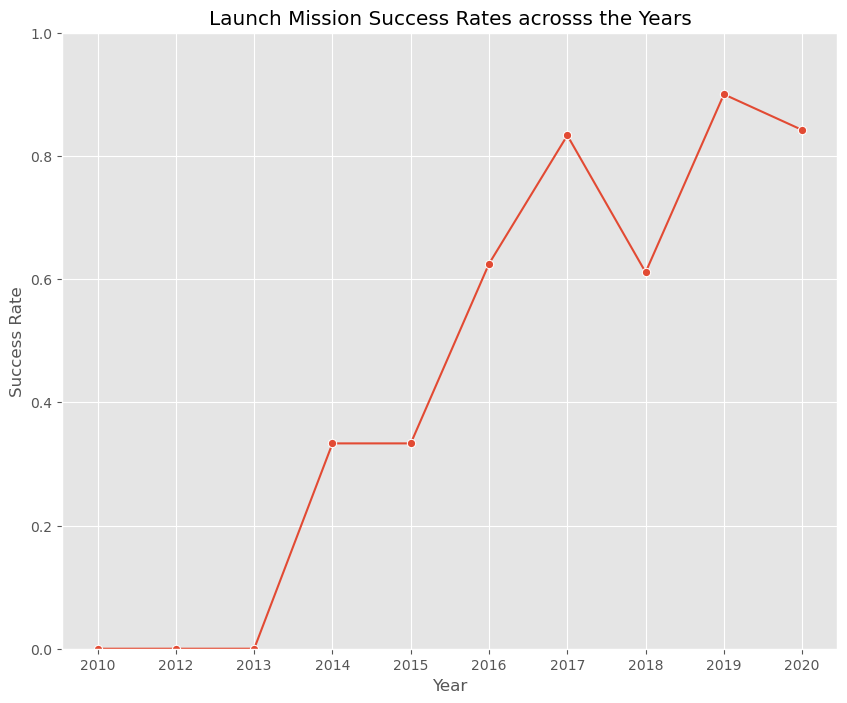

In [67]:
plt.figure(figsize=(10,8))
sns.lineplot(year_outcomes, x= 'Year', y='Class',
            marker = 'o')
plt.title('Launch Mission Success Rates acrosss the Years')
plt.xlabel('Year')
plt.ylabel('Success Rate')
plt.ylim(0, 1.0)
plt.show()

## Feature Engineering 

We shall use the following variables to determine the success prediction of our future model

In [68]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


#### 7. Create dummy variables to categorical columns 

In [78]:
columns = ['Orbit', 'LaunchSite', 'LandingPad', 'Serial']
features_one_hot = pd.get_dummies(features, columns = columns, dummy_na=False, dtype = 'float64')
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,525.000000,1,False,False,False,1.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,677.000000,1,False,False,False,1.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,500.000000,1,False,False,False,1.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,3170.000000,1,False,False,False,1.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 8. Cast all numeric columns to float64 

In [82]:
features_one_hot = features_one_hot.astype('float64')

In [83]:
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6104.959412,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Export the Dataset as a CSV

In [84]:
output = 'data/dataset_part_3.csv'
features_one_hot.to_csv(output, index=False)